# Despiking

In [1]:
import numpy as np
from scipy import signal
import pylab as pl
import matplotlib.pyplot as plt

# toggle between interactive and inline plotting
# %pylab qt
# %pylab inline

In [2]:
# Oct 20 - energetic morning
# fn1 = "sonar74_2018-10-20-13_08.dat"
# dn = "C:\\Projects\\AdvocateBeach2018\\data\\raw\\range_data\\20_10_2018\\AM\\"

# Irun = range(3500,16000)

# with open(dn+fn1, 'rb') as f:
#     clean_lines = ( line.replace(b'R',b'').replace(b'Oct',b'10').replace(b':',b' ') for line in f )
#     range1 = np.genfromtxt(clean_lines,usecols=(5,),delimiter=' ')

# range1 = range1[Irun]  

# 21 - cusp day
fn1 = "sonar74_2018-10-21-13_01.dat"
dn = "C:\\Projects\\AdvocateBeach2018\\data\\raw\\range_data\\21_10_2018\\AM\\"

# 23 - cusp day
fn1 = "sonar71_2018-10-23-13_37.dat"
dn = "C:\\Projects\\AdvocateBeach2018\\data\\raw\\range_data\\23_10_2018\\AM\\"

# unix tstapmp of main run start: 1540303640
# end: 1540308900

# fn1 = "sonar73_2018-10-24-14_14.dat"
# dn = "C:\\Projects\\AdvocateBeach2018\\data\\raw\\range_data\\24_10_2018\\PM\\"


with open(dn+fn1, 'rb') as f:
    clean_lines = ( line.replace(b'R',b'').replace(b'-',b' ') for line in f )
    rng = np.genfromtxt(clean_lines,usecols=(0,1,2,3,4,5,6,),delimiter=' ')   
    
range1 = rng[:,6]
date1 = rng[:,5] + rng[:,4]*60 + rng[:,3]*60*60 # in seconds [/day]

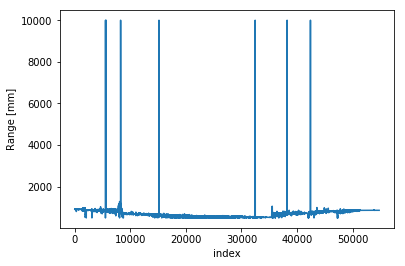

In [3]:
plt.figure
plt.plot(range1)
plt.xlabel('index')
plt.ylabel('Range [mm]')
# plt.ylim([500, 1500])
# plt.xlim([9000, 10000])
plt.show()

In [4]:
# remove large first differences
# Ijnk = np.where(abs(np.diff(range2)) > 250) or np.where(tmp2 < range2)
Ijnk = np.where(abs(np.diff(range1)) > 500)
tmp = np.copy(range1) 
tmp[Ijnk] = float('nan')  

for m in range(0,len(tmp)):
    if not np.isnan(m):
        if tmp[m] < 502.:
            tmp[m] = float('nan') 
        

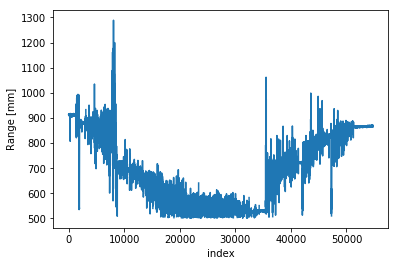

In [5]:
plt.figure
plt.plot(tmp)
plt.xlabel('index')
plt.ylabel('Range [mm]')
# plt.ylim([500, 1500])
# plt.xlim([9000, 10000])
plt.show()

In [6]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """
    
    import numpy 

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y


In [7]:
range_smth = smooth(tmp,window_len=7,window='flat') #x,window_len=11,window='hanning'

In [8]:
print(len(tmp))
print(len(range_smth))

54776
54782


Populating the interactive namespace from numpy and matplotlib


C:\Users\Owner\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


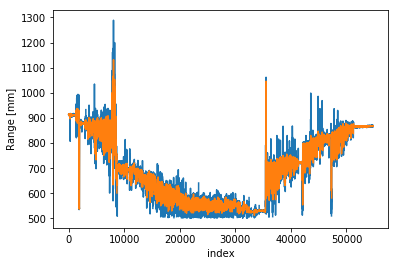

In [9]:
%pylab inline

plt.figure
plt.plot(tmp)
plt.plot(range_smth)
plt.xlabel('index')
plt.ylabel('Range [mm]')
# plt.ylim([900, 1050])
# plt.xlim([5000, 7000])
plt.show()

In [10]:
# remove returns further away than bed
range_smth[:len(tmp)]
tmp_range_smth = np.copy(range_smth[:len(tmp)])

for n in range(0,len(tmp)):
    
    if not np.isnan(tmp[n]):
        
        if tmp[n] > tmp_range_smth[n]:
            
            tmp[n] = tmp_range_smth[n]
        
        
# Ijnk = np.where(tmp > range_smth[:len(tmp)])

# tmp2 = np.copy(tmp) 

# for ind in Ijnk:
#     tmp2[ind] = range_smth[ind]

Populating the interactive namespace from numpy and matplotlib


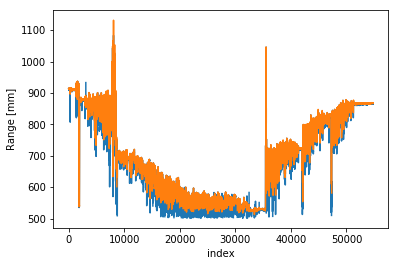

In [11]:
%pylab qt

plt.figure
plt.plot(tmp)
plt.plot(tmp_range_smth)
plt.xlabel('index')
plt.ylabel('Range [mm]')
# plt.ylim([900, 1050])
# plt.xlim([5000, 7000])
plt.show()

In [12]:
import pylab

In [13]:
# %pylab qt

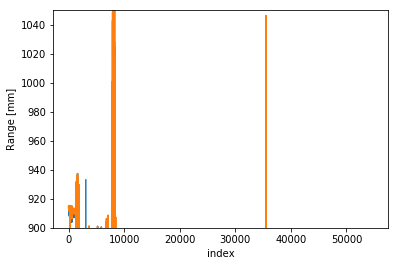

In [14]:
plt.figure
plt.plot(tmp)
plt.plot(range_smth)
plt.xlabel('index')
plt.ylabel('Range [mm]')
plt.ylim([900, 1050])
# plt.xlim([5000, 7000])
plt.show()

In [15]:
# y = signal.filtfilt(b, a, x, padlen=150)

# try focusing on bed data only -- call it the the bed if n [6-12?] preceding points are different by less than x mm [6?]
b_range = 6 # preceding range for use in determing if bed ...
d_thresh = 6

bed_vec = [float('nan'), float('nan'), float('nan'), float('nan'), float('nan'), float('nan')]

for ii in range(b_range, len(range1)):
    for jj in range(1, b_range):
        if abs(range1[ii] - range1[ii-jj]) > d_thresh:
            bval = float('nan')
            break
        bval = np.mean(range1[ii-b_range+1:ii])
    bed_vec.append(bval)    
            

In [16]:
%pylab qt

plt.figure
plt.plot(date1,range1)
plt.plot(date1,bed_vec)
plt.xlabel('time [s]')
plt.ylabel('Range [mm]')
# plt.ylim([550, 1150])
# plt.xlim([5000, 7000])
plt.show()

Populating the interactive namespace from numpy and matplotlib


C:\Users\Owner\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
len(bed_vec)
len(range1)

54776